Data Mining and Visualisation 2019-2020 <br>
Practical 1 - Data and Exploratory Data Analysis <br>
Teaching Assistant Muhammad Usman <br>

In [1]:
import math
import operator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from google.colab import files
files.upload()

Saving Dataset.csv to Dataset.csv


{'Dataset.csv': b'Class,PressureA,PressureV,FlowA,FlowV,WidthV,WidthA,CRVE_LEON,CRAE_LEON,FD,Tortuosity\r\nDiabetes,7.7122,0.4159,18.1633,5.8588,4.462060863,3.959631844,27.51381631,18.373,1.56545,1.051845097\r\nDiabetes,8.5249,0.6495,12.1205,7.6157,3.681498917,3.423604158,27.46517416,20.4585,1.68395,1.038491641\r\nDiabetes,8.0916,0.041,18.587,6.8225,3.653010422,3.66183161,26.48902633,15.7505,1.641175,0.902639297\r\nDiabetes,1.001,0.3482,14.5281,5.15,3.566513502,3.17529727,26.8722026,15.28475,1.645575,1.003063466\r\nDiabetes,5.5332,0.4037,29.2281,8.6945,3.776985888,3.582314391,26.28804308,15.4755,1.635375,1.106996776\r\nDiabetes,0.1696,0.3105,23.04,10.1557,3.967199863,3.27579915,24.9937992,17.05175,1.62945,1.128184385\r\nDiabetes,1.7293,1.0242,25.95,12.1674,3.974895791,3.575734164,24.816318,14.829,1.740075,0.949078976\r\nDiabetes,3.3012,6.8313,27.2068,11.9567,4.062864385,3.29394882,25.19467525,17.9385,1.593675,0.79563401\r\nDiabetes,1.8304,1.7738,18.2236,9.0739,3.520958089,3.20694761,19

In [2]:
mydata = pd.read_csv("Dataset.csv")
mydata.describe()

,PressureA,PressureV,FlowA,FlowV,WidthV,WidthA,CRVE_LEON,CRAE_LEON,FD,Tortuosity
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.711421,1.080386,18.308392,8.558376,4.239392,3.745573,27.275137,18.826111,1.632227,1.020315
std,3.048890,1.288950,5.691894,2.984448,0.623532,0.441641,4.018872,2.830349,0.058073,0.085807
min,0.023887,0.028947,7.247764,4.370861,3.129075,2.860443,16.137236,12.991000,1.441900,0.795634
25%,1.228100,0.402500,14.906188,6.356824,3.816822,3.423604,24.562025,16.893000,1.597000,0.957561
50%,3.301200,0.513533,19.044420,8.026800,4.086138,3.704254,27.280734,18.866250,1.641900,1.000099
75%,5.533200,1.728644,20.576394,9.467611,4.462061,3.959632,30.616238,20.701000,1.673875,1.084761
max,11.704232,6.831300,29.234000,17.678900,5.909894,4.841411,35.135187,24.741000,1.740075,1.251316


In [3]:
mydata.count(), len(mydata.columns)

(Class         200
 PressureA     200
 PressureV     200
 FlowA         200
 FlowV         200
 WidthV        200
 WidthA        200
 CRVE_LEON     200
 CRAE_LEON     200
 FD            200
 Tortuosity    200
 dtype: int64, 11)

In [4]:
print ("Empty values: {}.".format(mydata.isnull().values.any()))

Empty values: False.


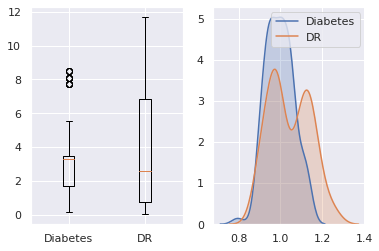

In [5]:
diabetes   = mydata[mydata.Class == "Diabetes"]
DR = mydata[mydata.Class == "DR"] 
# Get Arterial Blood Pressure from both 
data = [diabetes.PressureA, DR.PressureA]
# Subplot the data to a boxplot for both
plt.figure()
ax1 = plt.subplot(121)
plt.boxplot(data, labels = ["Diabetes", "DR"])
# Subplot the density plot of the diabetes and non diabetes
ax2 = plt.subplot(122)
pt = sns.kdeplot(diabetes.Tortuosity, shade=True, label="Diabetes")
pt = sns.kdeplot(DR.Tortuosity, shade=True, label="DR")
# Show plots
plt.show()

In [6]:
max(mydata['CRVE_LEON'])

35.13518732

In [11]:
np.percentile(mydata['CRAE_LEON'], 50)

18.86625

In [12]:
np.percentile(mydata['CRAE_LEON'], 75)

20.701

In [18]:
np.std(mydata['CRAE_LEON'])

2.8232644880358553

In [20]:
mydata['CRVE_LEON']

0      27.513816
1      27.465174
2      26.489026
3      26.872203
4      26.288043
         ...    
195    26.545737
196    28.494387
197    27.890158
198    27.280734
199    31.887966
Name: CRVE_LEON, Length: 200, dtype: float64

In [25]:
print(mydata)

        Class  PressureA  PressureV  ...  CRAE_LEON        FD  Tortuosity
0    Diabetes   7.712200   0.415900  ...   18.37300  1.565450    1.051845
1    Diabetes   8.524900   0.649500  ...   20.45850  1.683950    1.038492
2    Diabetes   8.091600   0.041000  ...   15.75050  1.641175    0.902639
3    Diabetes   1.001000   0.348200  ...   15.28475  1.645575    1.003063
4    Diabetes   5.533200   0.403700  ...   15.47550  1.635375    1.106997
..        ...        ...        ...  ...        ...       ...         ...
195        DR   9.927671   0.053736  ...   22.17280  1.655200    1.115552
196        DR   6.735163   6.831268  ...   20.56100  1.636700    0.917920
197        DR   6.735163   1.647148  ...   22.31200  1.655200    0.959716
198        DR   0.023887   1.678900  ...   20.62500  1.625300    1.166560
199        DR   0.800203   2.060424  ...   20.70100  1.643700    1.000827

[200 rows x 11 columns]


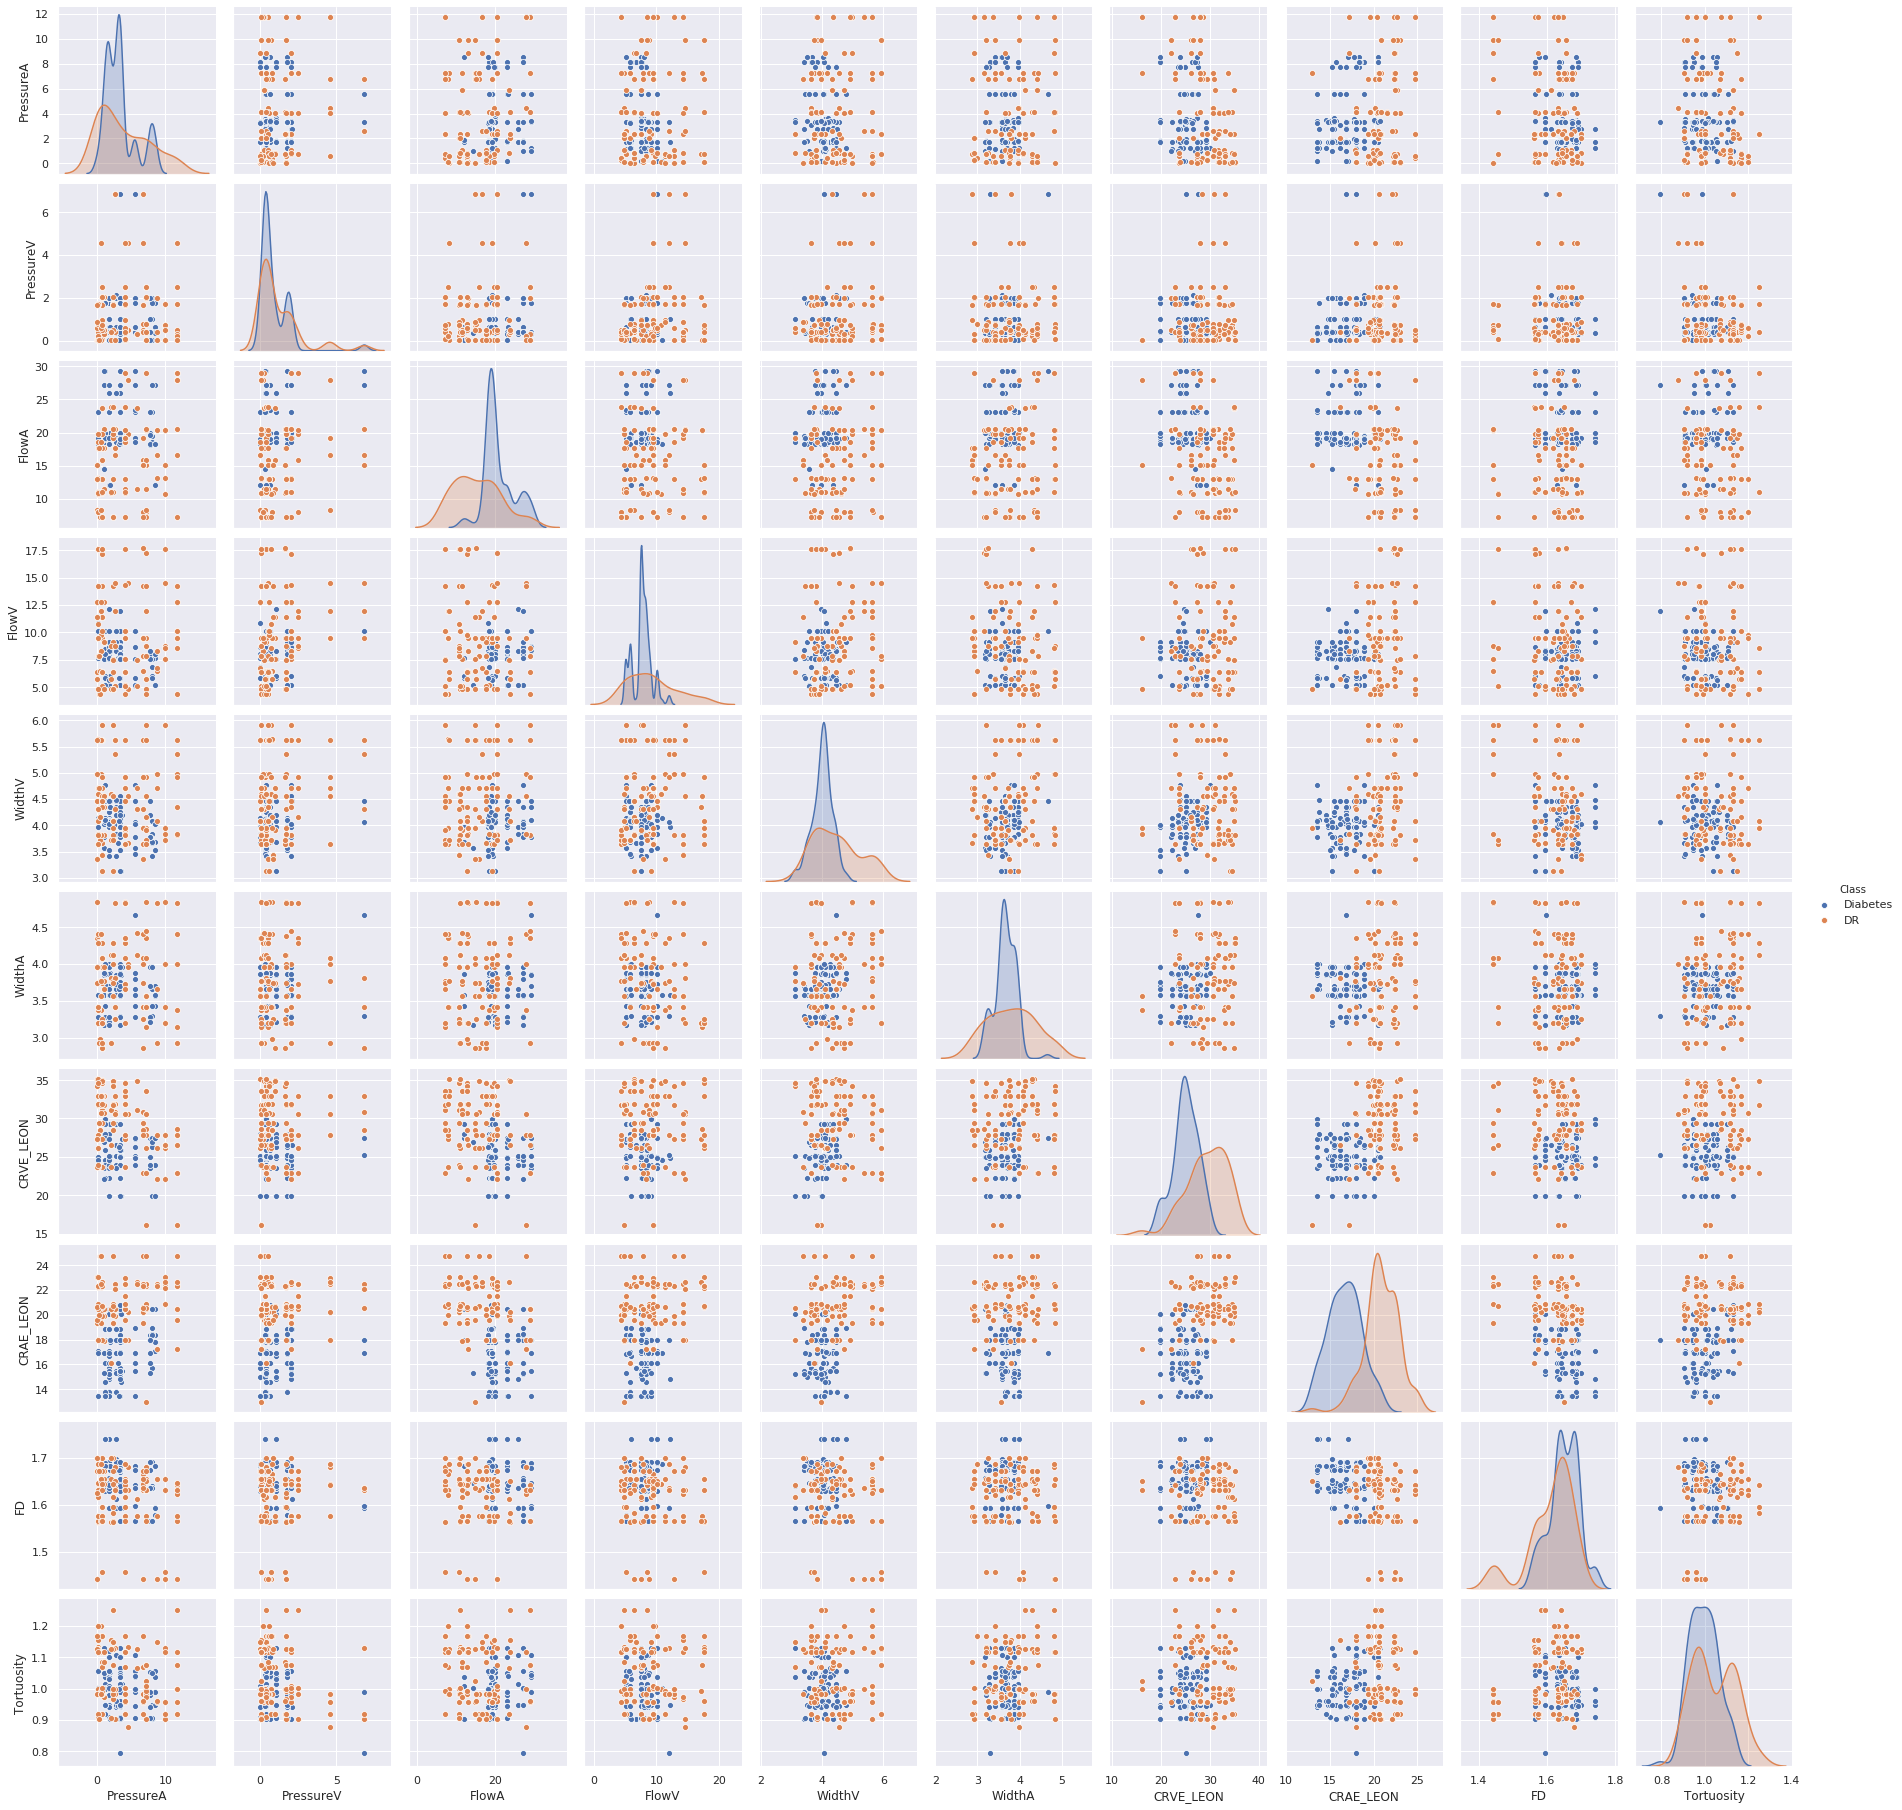

In [33]:
sns.pairplot(mydata, hue="Class")

In [27]:
type(mydata)

pandas.core.frame.DataFrame